In [111]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import pandas  as pd
import numpy   as np
import seaborn as sns

In [113]:
source_data = pd.read_excel("ID_data_mass_18122012.xlsx", sheet_name="VU")
source_data.head()

,№,дд.мм.гггг,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С","Тна шлейфе, С",Тзаб С,Tлин С,Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Дебит смеси 1000 м3/сут,Линейные условия Дебит гааз м3/сут,Линейные условия Дебит кон нестабильный м3/сут,Линейные условия Дебит воды м3/сут,Нэф м,Рпл. Тек (послед точка на КВД) МПа,Рпл. Тек (Расчет по КВД) МПа,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
0,804,2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,53.0,31.7,103.2,32.5,214.704,83.6,0.4,231.24884,1610.368866,131.3,0.4,56.8,45.25,56.5,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
1,804,2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,58.8,37.6,103,38.6,290.594,104.7,1.4,309.00166,2310.226429,158.5,1.4,56.8,45.25,56.5,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
2,804,2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,63.6,42.8,102.6,43.4,368.042,114.3,1.9,388.11498,3039.48968,172.3,1.9,56.8,45.25,56.5,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
3,804,2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,64.7,46.2,102,46.1,434.663,121.3,3.3,455.21452,3824.082686,181.5,3.3,56.8,45.25,56.5,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
4,804,2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,64.0,49.4,104.4,49.9,483.283,129.8,4.6,504.58778,4299.104676,190.6,4.7,56.8,45.25,56.5,-,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,NaN


In [114]:
source_data.describe()

,№,Dшт мм,"Руст, бара","Руст, бар","Туст, С",Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Нэф м,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,23.000000,70.00000
mean,19456.291892,10.997405,229.597848,228.768131,55.284865,382.870055,114.397308,2.407085,48.478223,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,265.028478,0.18090
std,6543.332900,2.493816,48.864049,48.902445,10.959738,153.070183,58.848155,2.273610,12.325657,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,40.997125,0.03038
min,804.000000,6.350000,111.100000,109.000000,24.200000,100.300000,26.200000,0.000000,22.100000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,199.627612,0.13100
25%,21002.000000,9.530000,200.000000,200.000000,48.200000,251.500000,72.700000,0.728749,43.000000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,237.545619,0.15700
50%,21303.000000,11.110000,232.000000,231.000000,56.500000,366.218938,98.200438,1.554165,45.200000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,255.681127,0.17900
75%,22501.000000,12.700000,260.305556,259.392000,64.000000,489.673000,142.148359,3.496397,62.572400,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,288.891902,0.20000
max,22505.000000,17.460000,348.000000,348.000000,75.000000,846.816143,302.621077,11.222107,72.539800,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949,0.27000


Произведём перевод в numeric величины, которые pandas сразу из-за строк таковыми не сделал.
Единственный тип, который оставим - дату.

In [115]:
df = source_data.copy()

for key in df.keys().values:
    column = df.get(key=key)

    if key != "дд.мм.гггг":
        column = pd.to_numeric(column, errors='coerce')

    df.pop(key)
    df[key] = column


In [116]:
df.describe()

,№,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С","Тна шлейфе, С",Тзаб С,Tлин С,Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Дебит смеси 1000 м3/сут,Линейные условия Дебит гааз м3/сут,Линейные условия Дебит кон нестабильный м3/сут,Линейные условия Дебит воды м3/сут,Нэф м,Рпл. Тек (послед точка на КВД) МПа,Рпл. Тек (Расчет по КВД) МПа,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
count,185.000000,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,123.000000,181.000000,178.000000,185.000000,185.000000,185.000000,176.000000,178.000000,178.000000,178.000000,185.000000,177.000000,158.000000,135.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,23.000000,70.00000
mean,19456.291892,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.335772,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,265.028478,0.18090
std,6543.332900,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.322736,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,40.997125,0.03038
min,804.000000,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,199.627612,0.13100
25%,21002.000000,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.050000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,237.545619,0.15700
50%,21303.000000,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,255.681127,0.17900
75%,22501.000000,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.100000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,288.891902,0.20000
max,22505.000000,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949,0.27000


Напишем describe, рекомендованный Александром Владимировичем

In [117]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

C:\Users\egork\AppData\Local\Temp\ipykernel_15536\386298352.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(q=0.25) #первый квартиль
C:\Users\egork\AppData\Local\Temp\ipykernel_15536\386298352.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  MA=df.mean() #среднее значение
C:\Users\egork\AppData\Local\Temp\ipykernel_15536\386298352.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ME=df.median() #медиана
C:\Users\egork\AppData\Local\Temp\ipykernel_15536\386298352.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to 

In [118]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,№,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С","Тна шлейфе, С",Тзаб С,Tлин С,Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Дебит смеси 1000 м3/сут,Линейные условия Дебит гааз м3/сут,Линейные условия Дебит кон нестабильный м3/сут,Линейные условия Дебит воды м3/сут,Нэф м,Рпл. Тек (послед точка на КВД) МПа,Рпл. Тек (Расчет по КВД) МПа,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
Количество,185,181,185,185,181,178,185,181,174,185,123,181,178,185,185,185,176,178,178,178,185,177,158,135,178,178,23,93,23,93,23,23,70
Процент пропусков,0.000000,2.162162,0.000000,0.000000,2.162162,3.783784,0.000000,2.162162,5.945946,0.000000,33.513514,2.162162,3.783784,0.000000,0.000000,0.000000,4.864865,3.783784,3.783784,3.783784,0.000000,4.324324,14.594595,27.027027,3.783784,3.783784,87.567568,49.729730,87.567568,49.729730,87.567568,87.567568,62.162162
Минимум,804,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.000000,0.570000,2.782623,199.627612,0.131000
Первый квартиль,21002.000000,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.050000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.000000,0.660000,4.381813,237.545619,0.157000
Среднее,19456.291892,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.335772,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.000000,0.665260,5.742359,265.028478,0.180900
Медиана,21303.000000,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.000000,0.667000,5.250915,255.681127,0.179000
Третий квартиль,22501.000000,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.100000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.000000,0.679000,6.125723,288.891902,0.200000
Максимум,22505,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949,0.270000
Стандартное отклонение,6543.332900,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.322736,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.000000,0.020485,2.112717,40.997125,0.030380
Мощность,14,37,14,173,178,176,139,172,168,94,102,121,174,185,183,144,176,175,170,63,25,39,34,24,113,113,6,25,1,21,23,23,49


Удалим столбцы с большим процентом пропусков

In [119]:
df = df.drop(["Ro_g кг/м3", "Ro_w кг/м3"], axis=1)

Заполним пропуски средним значением

In [120]:
for key in df.keys().values:
    if key != 'дд.мм.гггг' and f[key].iloc[1] < 30 and f[key].iloc[1] > 0:
        df[key] = df[key].fillna(f[key].iloc[4])

Проверим - все (0 < x < 30) зелёное

Посмотрим тепловую карту (она достаточная, но необходимая):

C:\Users\egork\AppData\Local\Temp\ipykernel_15536\2680799182.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=1, cbar=False)


<Axes: >

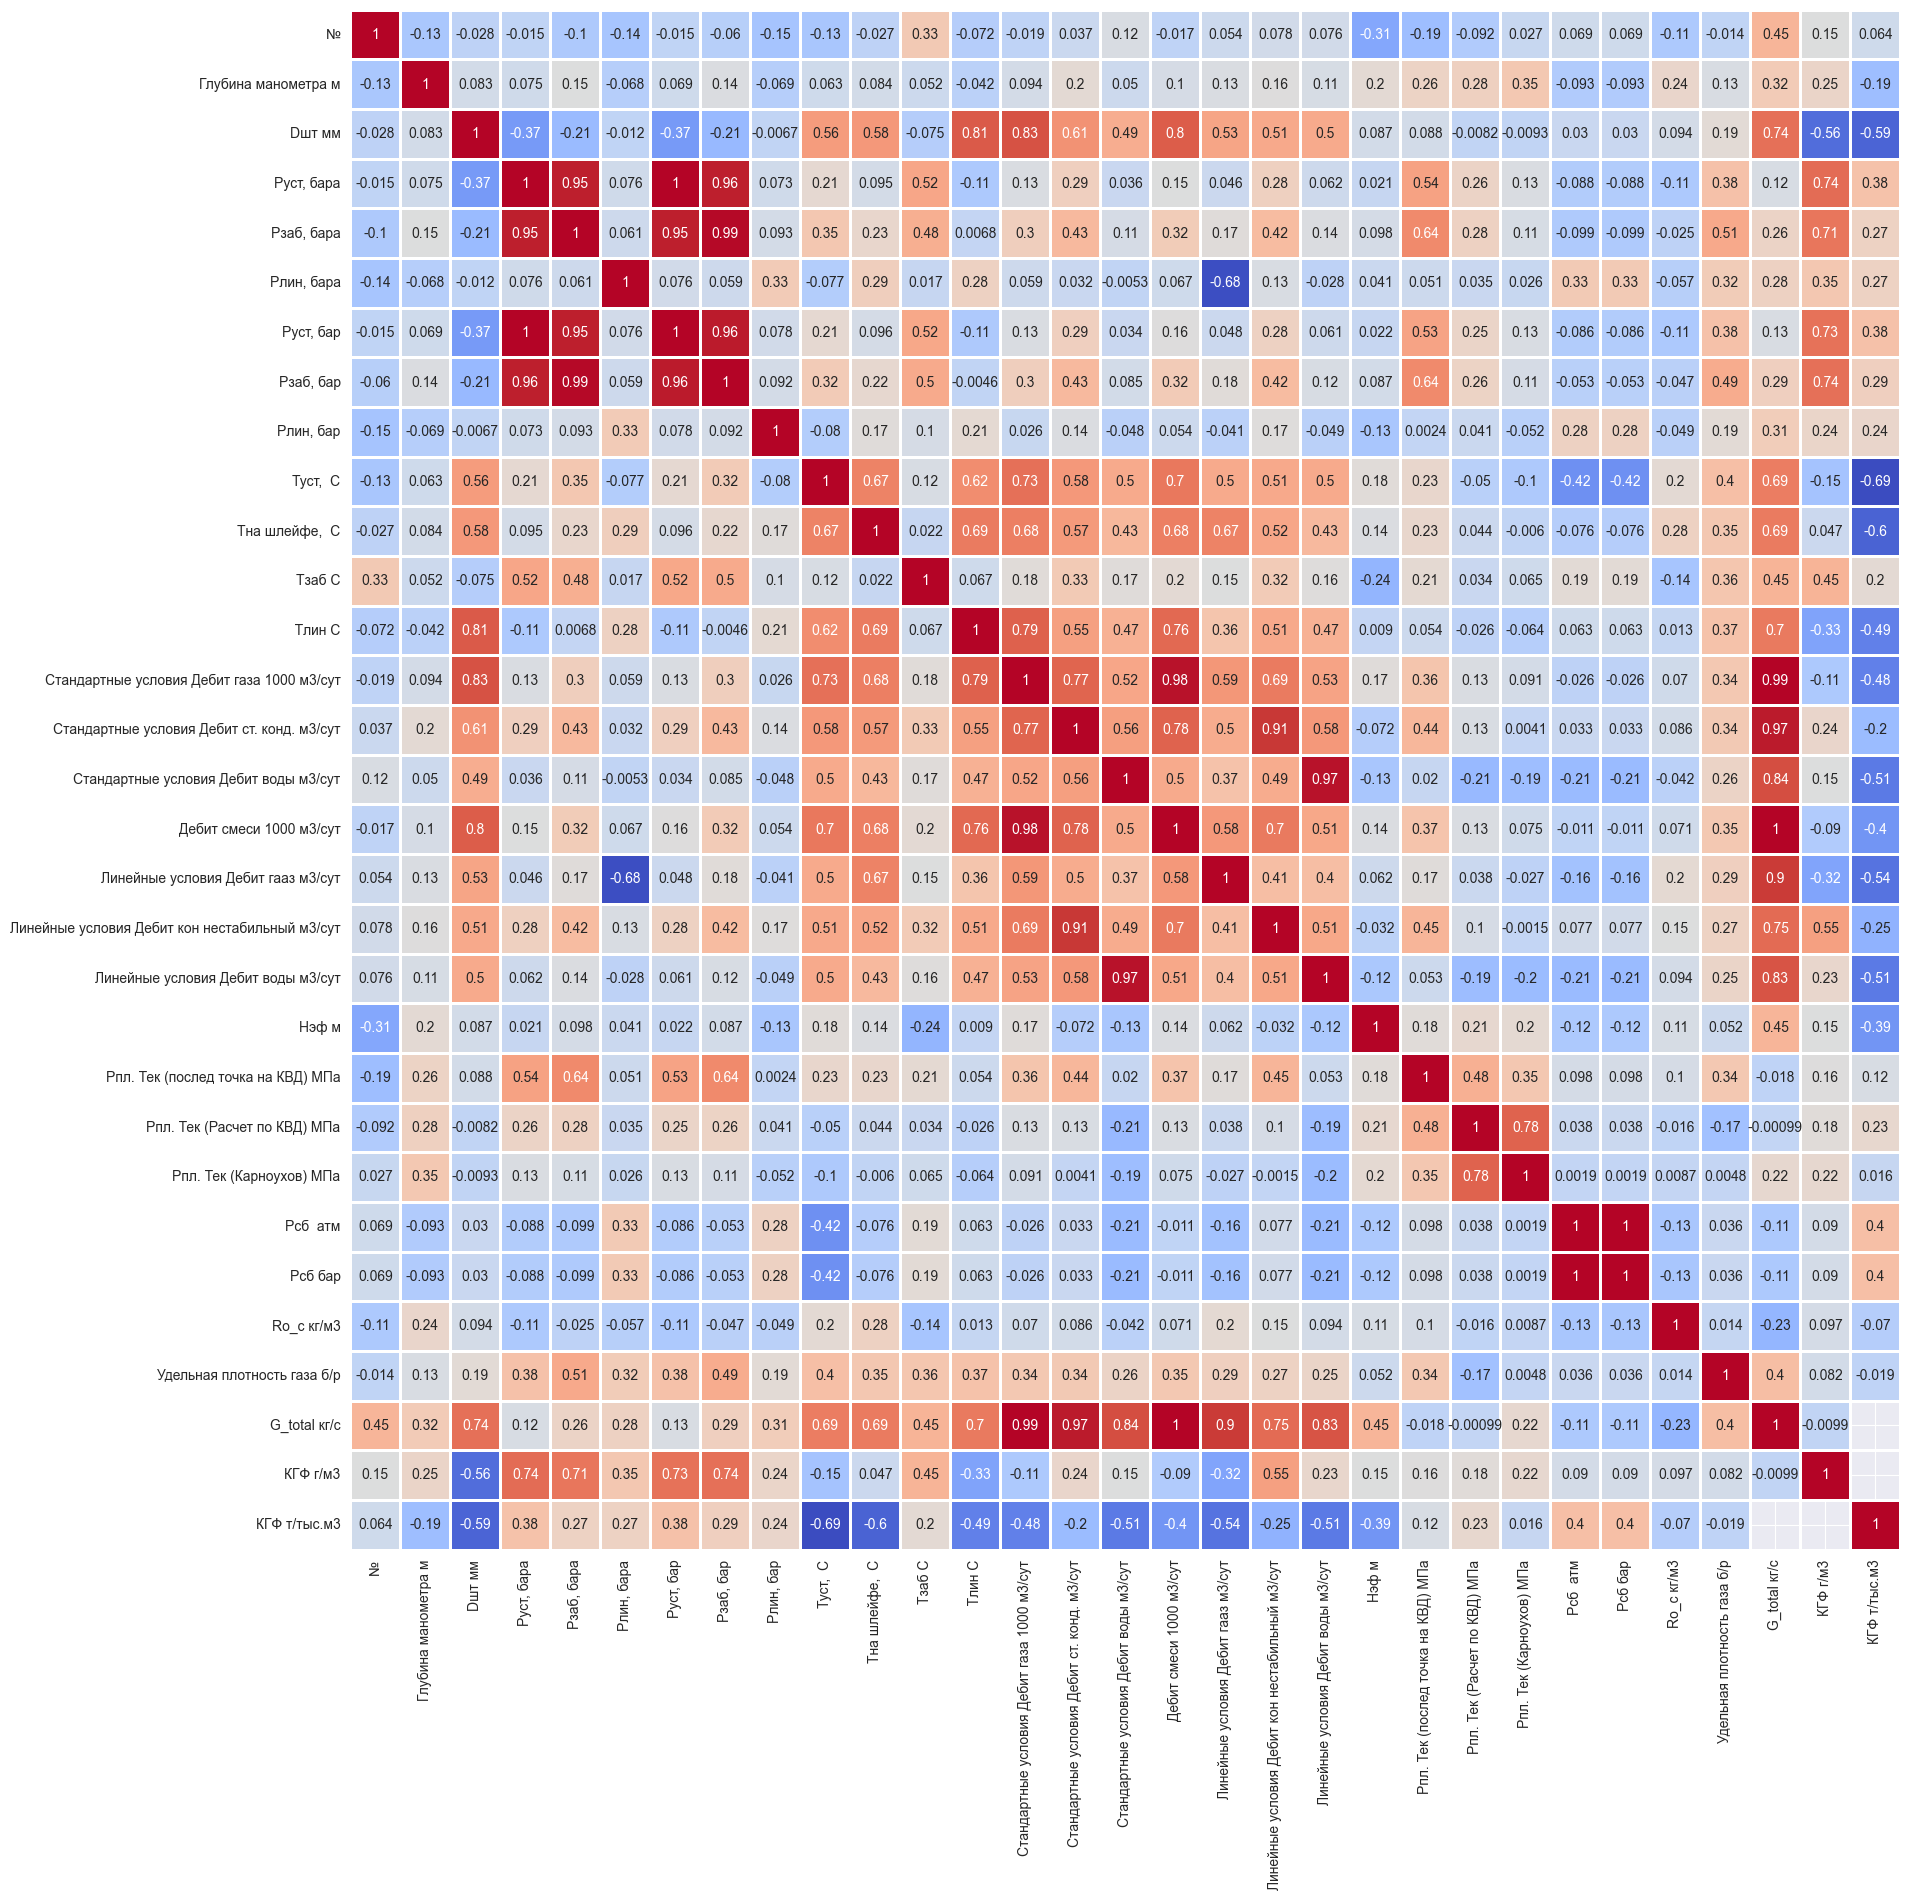

In [121]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=1, cbar=False)

Посмотрим на мощности классов:

In [122]:
df.nunique().sort_values()

№                                                  14
Dшт мм                                             14
Удельная плотность газа б/р                        21
G_total кг/с                                       23
КГФ г/м3                                           23
Ro_c кг/м3                                         25
Рпл. Тек (Карноухов) МПа                           25
Нэф м                                              25
Рпл. Тек (Расчет по КВД) МПа                       35
Глубина манометра м                                38
Рпл. Тек (послед точка на КВД) МПа                 40
КГФ т/тыс.м3                                       49
Линейные условия Дебит воды м3/сут                 64
Туст,  С                                           94
Тна шлейфе,  С                                    102
Pсб бар                                           114
Pсб  атм                                          114
Тзаб С                                            122
Руст, бар                   

Всего около 180, поэтому с 14 по 21 сделаем типа object

In [123]:
# df[["№", "Dшт мм", "Удельная плотность газа б/р"]] = df[["№", "Dшт мм", "Удельная плотность газа б/р"]].astype(object)
# df.describe(include=object)

In [124]:
kgf_meters = df['КГФ г/м3']
kgf_meters = kgf_meters.fillna(0)
df['КГФ т/тыс.м3'] = df['КГФ т/тыс.м3'].fillna(0)
df['КГФ т/тыс.м3'] += kgf_meters / 1000

df = df.drop("КГФ г/м3", axis=1)

In [125]:
df['КГФ т/тыс.м3'] = df['КГФ т/тыс.м3'].replace(0, np.nan)
df['КГФ т/тыс.м3'].values.tolist()

[0.3119094,
 0.28860030000000003,
 0.2487906,
 0.2235591,
 0.2151486,
 0.241130793707915,
 nan,
 nan,
 nan,
 nan,
 0.188,
 0.178,
 0.169,
 0.162,
 0.23,
 0.201,
 0.172,
 0.157,
 0.141,
 0.172,
 0.385415949386802,
 0.2955028799822254,
 0.2556811274112498,
 0.23396044419658496,
 0.22310946098417853,
 0.1996276122551797,
 0.2456833574872083,
 0.294587295099189,
 0.2822444097309461,
 0.2805615294373049,
 0.2922406966150632,
 0.28408411224113483,
 0.28918350400329434,
 0.28751751463022257,
 0.254839032065248,
 0.243234996427721,
 0.219042278656448,
 0.27,
 0.251,
 0.236,
 0.217,
 0.2,
 0.18,
 0.169,
 0.16,
 0.156,
 0.153,
 0.152,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.152,
 0.138,
 0.131,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.212,
 0.194,
 0.187,
 0.18,
 0.198,
 0.174,
 0.171,
 0.165,
 0.162,
 nan,
 nan,
 nan,
 0.14,
 nan,
 0.154,
 0.141,
 0.139,
 0.132,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

Gain ratio: GR(S) = InfoGain(S) / SplitInfo(S) - БРО

InfoGain(S, a) = H(S) - H(S|a)

H(S) - энтропия (самим реализовать)
H(S|a)   <----
             |
X = {x1, x2, ..., xs}

SplitInfo(S) = sum from i=1 to n {N(ti) / N (s)} * log2(N(ti) / N(S))
N - число уникальных вхождений конкретной фичи
НЕ БРО - Mutual info

![title](eywau-ntm5stedcuyrelbhhoipu.png)

In [408]:
def entropy(S):
    S = S.fillna(-1)
    unique, count = np.unique(S, return_counts=True, axis=0)
    prob = count / np.sum(count)
    return -np.sum(prob * np.log2(prob))


![title](join_entropy.png)

In [409]:
def join_entropy(Y, X):
    Y = Y.fillna(-1)
    X = X.fillna(-1)

    unique, count = np.unique(X, return_counts=True, axis=0)
    X_ = pd.DataFrame({'x' : unique, 'count_X' : count})


    YX = pd.DataFrame({'y' : Y, 'x' : X})
    YX = YX.groupby(['y', 'x']).size().reset_index().rename(columns={0:'count'})

    YX = YX.join(X_, how='inner', lsuffix='x', rsuffix='x')
    prob = (YX['count'] / np.sum(YX['count'])) / (YX['count_X'] / np.sum(YX['count_X']))

    return -np.sum(prob * np.log2(prob))

In [410]:
def info_gain(Y, X) :
    return entropy(Y) - join_entropy(X, Y)


In [411]:
def split_info(S):
    S = S.fillna(-1)
    unique, count = np.unique(S, return_counts=True, axis=0)
    print(S.nunique())
    div =  np.divide(count, len(S))
    return -np.sum(div * np.log2(div))

In [412]:
def gain_ratio(S, a):
    return info_gain(S, a) / split_info(S)

№
14
Глубина манометра м
38
Dшт мм
14
Руст, бара
173
Рзаб, бара
179
Pлин, бара
177
Руст, бар
139
Рзаб, бар
173
Рлин, бар
169
Туст,  С
94
Тна шлейфе,  С
103
Тзаб С
122
 Tлин С
175
Стандартные условия Дебит газа 1000 м3/сут
185
Стандартные условия Дебит ст. конд. м3/сут
183
Стандартные условия Дебит воды м3/сут
144
Дебит смеси 1000 м3/сут
177
Линейные условия Дебит гааз м3/сут
176
Линейные условия Дебит кон нестабильный м3/сут
171
Линейные условия Дебит воды м3/сут
64
Нэф м
25
Рпл. Тек (послед точка на КВД) МПа
40
Рпл. Тек (Расчет по КВД) МПа
35
Рпл. Тек (Карноухов) МПа
25
Pсб  атм
114
Pсб бар
114
Ro_c кг/м3
26
Удельная плотность газа б/р
22
G_total кг/с
24
КГФ т/тыс.м3
73
№
14
Глубина манометра м
38
Dшт мм
14
Руст, бара
173
Рзаб, бара
179
Pлин, бара
177
Руст, бар
139
Рзаб, бар
173
Рлин, бар
169
Туст,  С
94
Тна шлейфе,  С
103
Тзаб С
122
 Tлин С
175
Стандартные условия Дебит газа 1000 м3/сут
185
Стандартные условия Дебит ст. конд. м3/сут
183
Стандартные условия Дебит воды м3/сут
144
Дебит

<Axes: >

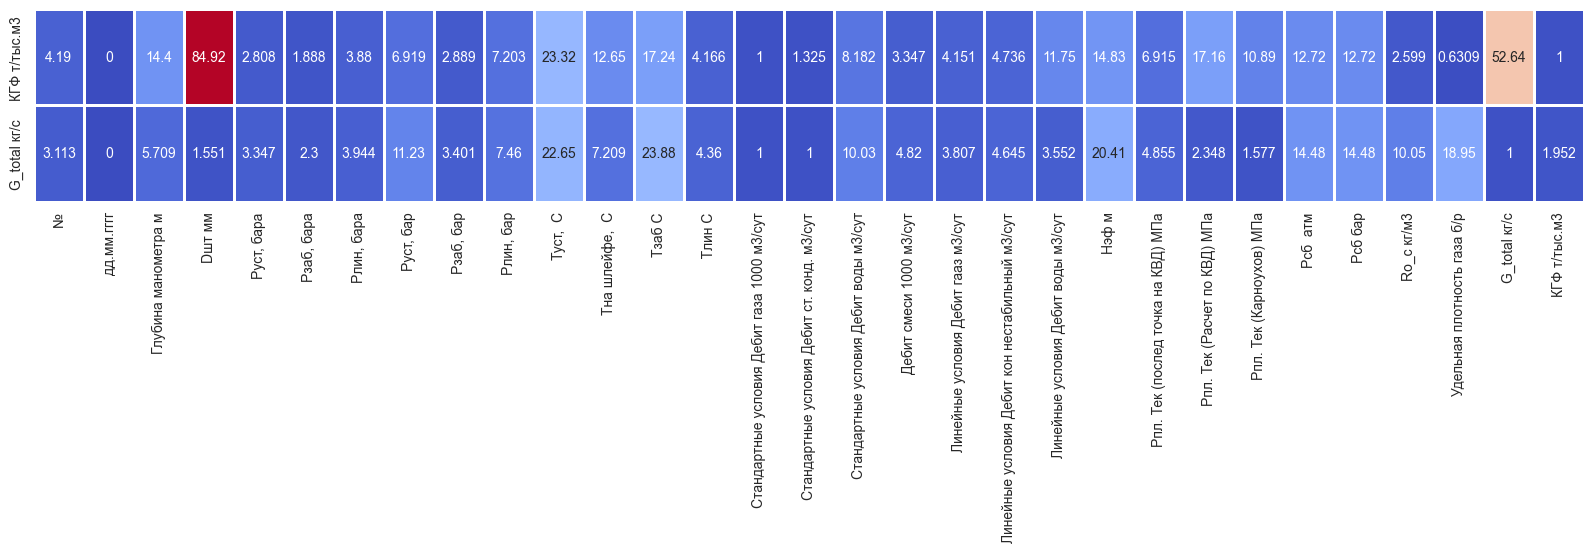

In [413]:
store = pd.DataFrame(columns=df.keys(), index=['КГФ т/тыс.м3', 'G_total кг/с'])

for b in ['КГФ т/тыс.м3', 'G_total кг/с']:
        for a in df.keys():
            if (a != 'дд.мм.гггг'):
                print(a)
                store._set_value(b, a, gain_ratio(df[a], df[b]))

fig, ax = plt.subplots(figsize=(20, 2.5))
sns.heatmap(store.fillna(0).applymap(float), cmap='coolwarm', annot=True, linewidths=1, cbar=False, fmt = ".4g")

<Axes: xlabel='Рпл. Тек (Карноухов) МПа', ylabel='КГФ т/тыс.м3'>

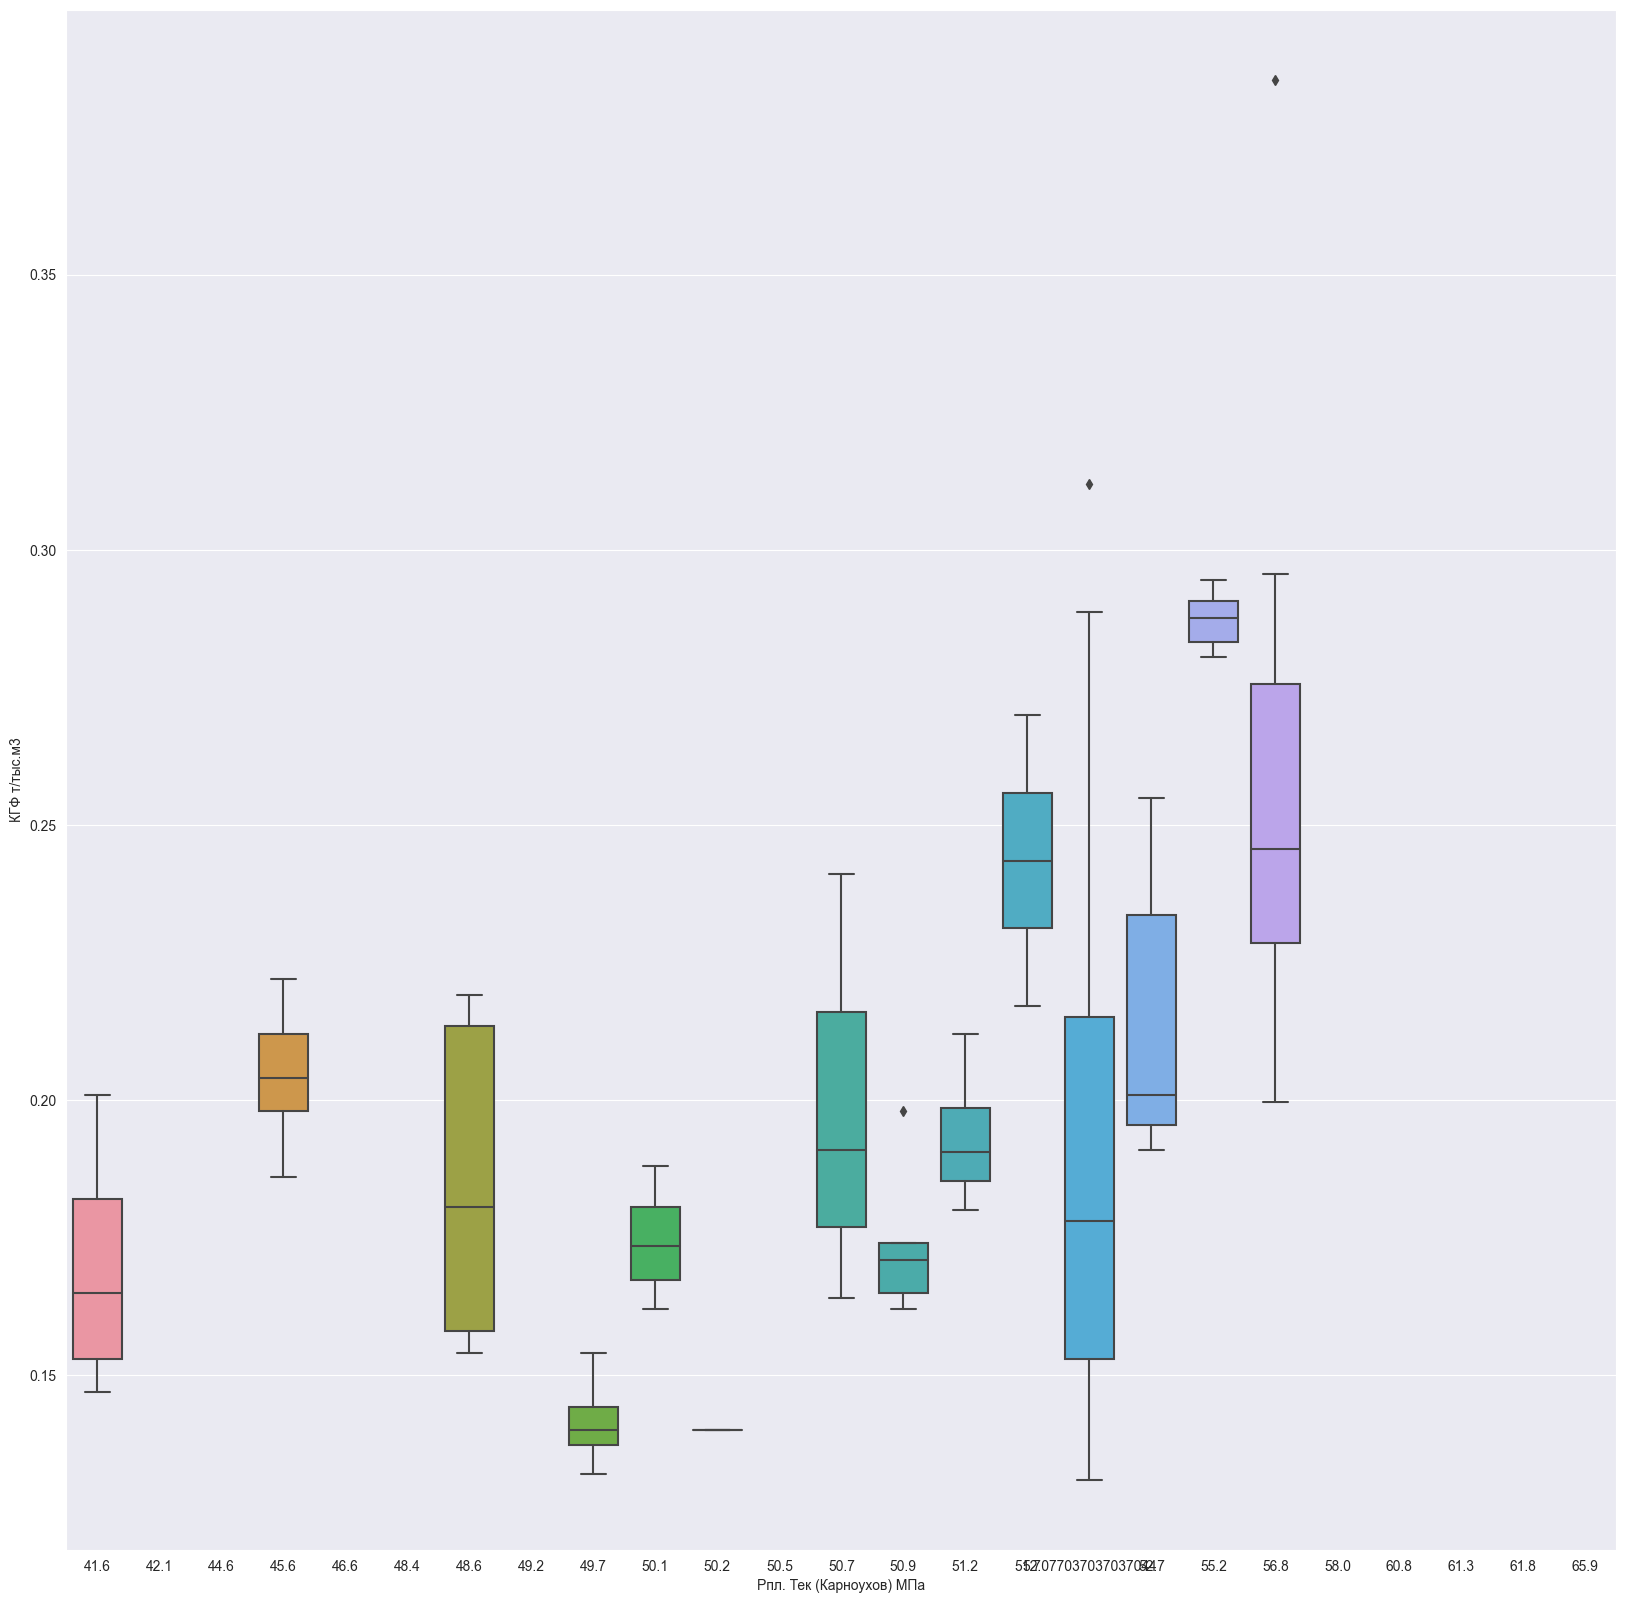

In [414]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(df, y='КГФ т/тыс.м3', x='Рпл. Тек (Карноухов) МПа')

<Axes: xlabel='G_total кг/с', ylabel='Руст, бар'>

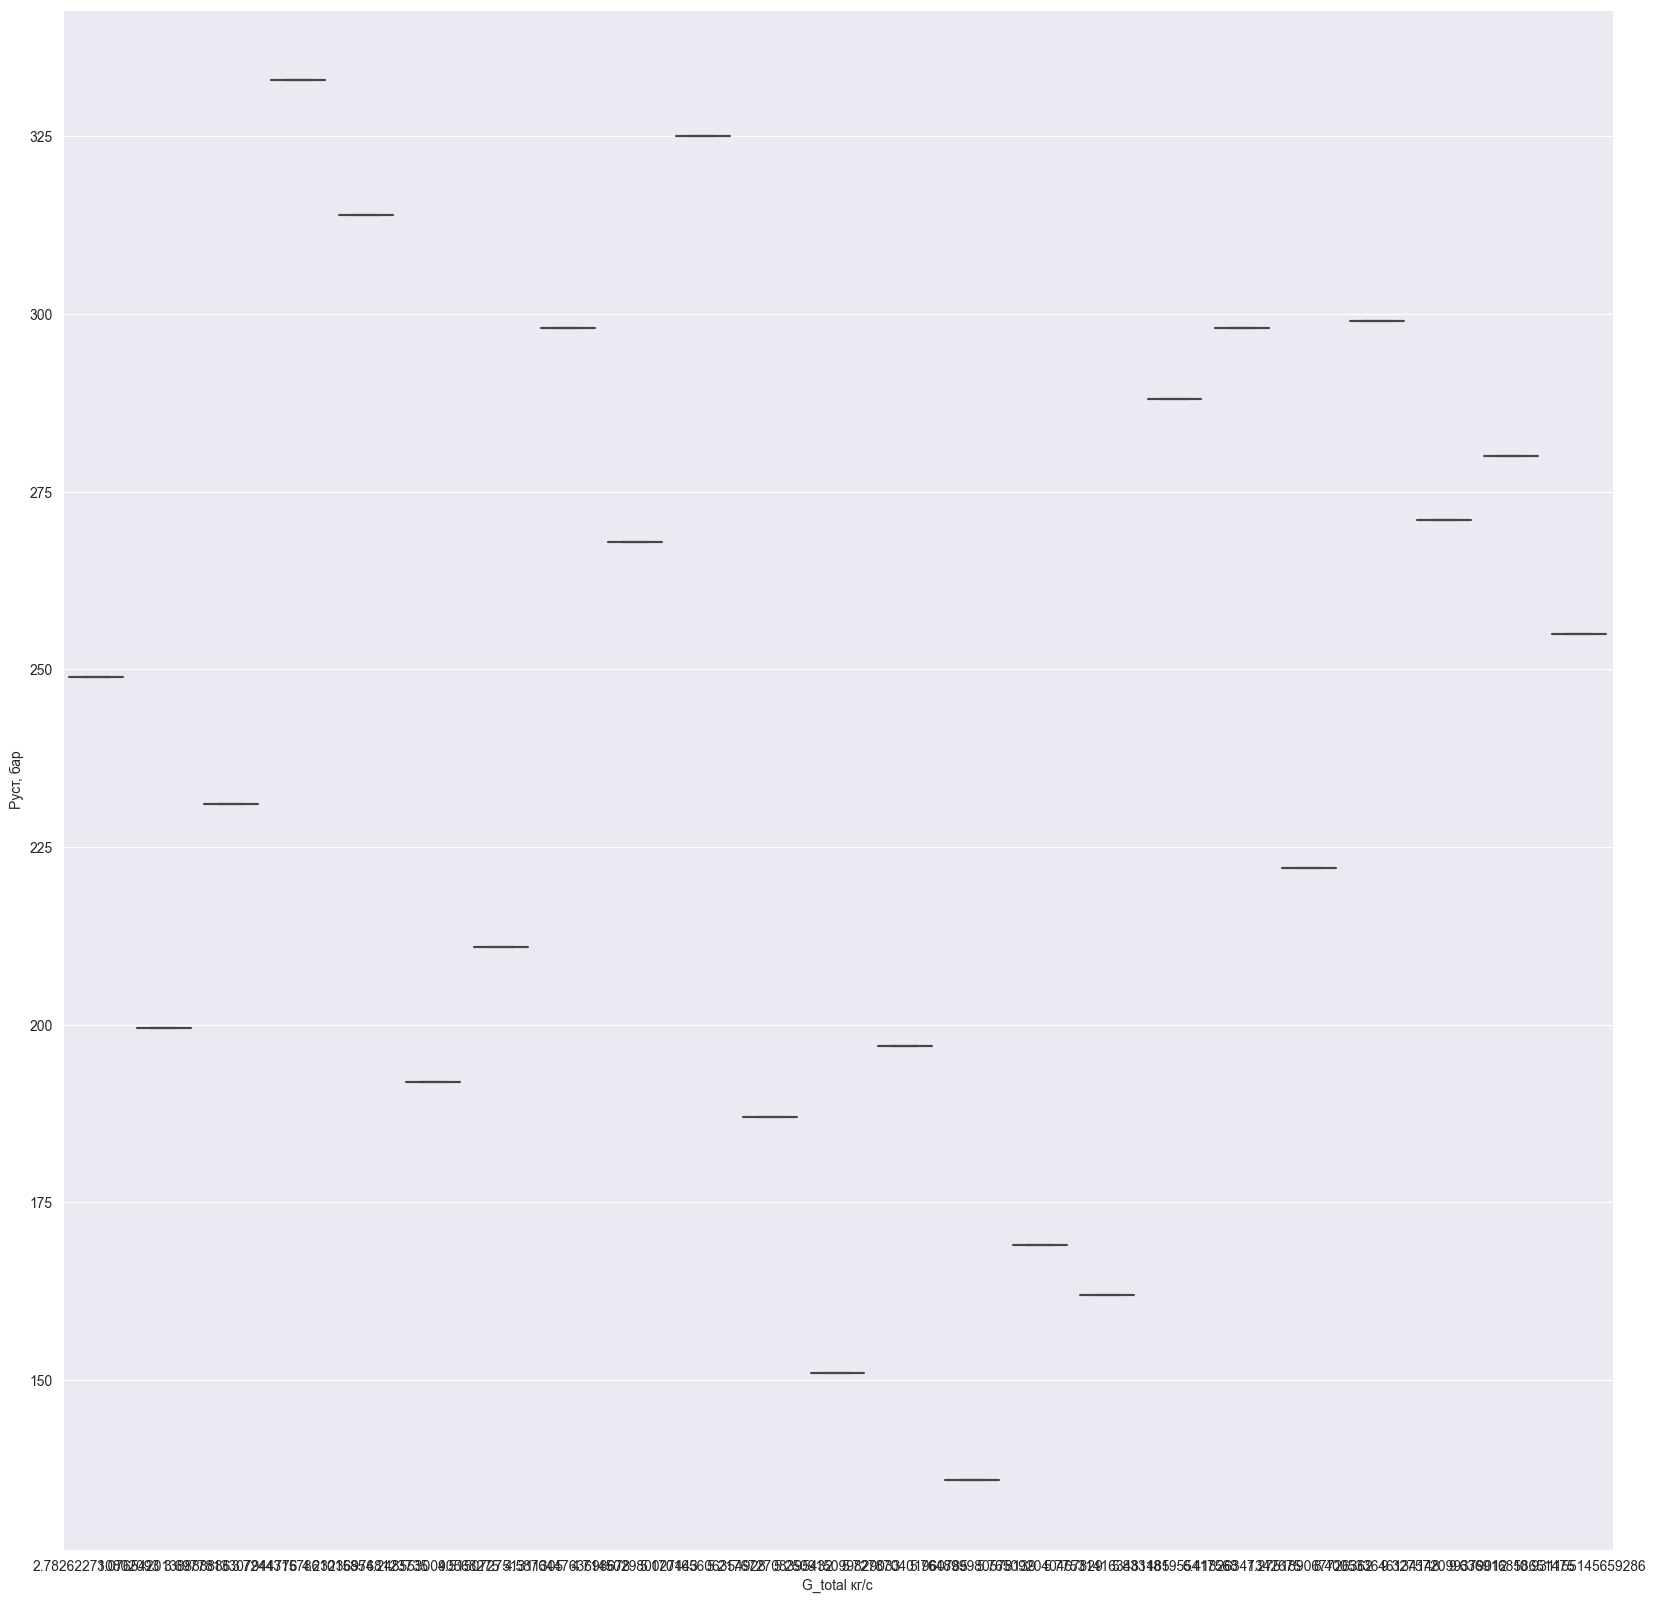

In [415]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(df, y='Руст, бар', x='G_total кг/с')

In [416]:
df

,№,дд.мм.гггг,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С","Тна шлейфе, С",Тзаб С,Tлин С,Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Дебит смеси 1000 м3/сут,Линейные условия Дебит гааз м3/сут,Линейные условия Дебит кон нестабильный м3/сут,Линейные условия Дебит воды м3/сут,Нэф м,Рпл. Тек (послед точка на КВД) МПа,Рпл. Тек (Расчет по КВД) МПа,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_c кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ т/тыс.м3
0,804,2008-06-05,3576.300000,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.20000,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.300000,0.400000,56.8000,45.250000,56.500000,52.077037,93.600000,92.376018,801.00,0.669449,2.782623,0.311909
1,804,2008-06-06,3576.300000,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.00000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.500000,1.400000,56.8000,45.250000,56.500000,52.077037,92.900000,91.685171,801.00,0.669449,3.697781,0.288600
2,804,2008-06-07,3576.300000,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.60000,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.300000,1.900000,56.8000,45.250000,56.500000,52.077037,91.400000,90.204787,801.00,0.669449,4.515073,0.248791
3,804,2008-06-08,3576.300000,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.00000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.500000,3.300000,56.8000,45.250000,56.500000,52.077037,89.200000,88.033555,801.00,0.669449,5.217673,0.223559
4,804,2008-06-09,3576.300000,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.40000,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.600000,4.700000,56.8000,45.250000,56.500000,52.077037,89.700000,88.527017,801.00,0.669449,5.765092,0.215149
5,804,2011-06-17,3576.300000,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.64000,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.000000,0.600000,56.8000,41.224310,48.300000,52.077037,90.700000,89.513940,789.80,0.675000,3.076542,0.241131
6,807,2004-09-16,3590.000000,7.93,284.317950,391.823775,97.588175,284.317950,391.823775,98.147579,46.0,NaN,102.80000,38.839565,198.900000,70.600000,0.000000,206.056016,3441.014650,177.871348,2.516854,57.2000,41.880000,52.300000,51.700000,94.987597,93.745470,NaN,NaN,NaN,NaN
7,807,2004-09-16,3590.000000,11.11,270.943050,384.224400,97.588175,270.943050,384.224400,98.147579,56.0,NaN,102.90000,38.839565,341.500000,129.300000,0.100000,354.651203,3441.014650,177.871348,2.516854,57.2000,41.880000,52.300000,51.700000,94.987597,93.745470,NaN,NaN,NaN,NaN
8,807,2004-09-17,3590.000000,14.28,245.510475,371.912399,97.588175,245.510475,371.912399,98.147579,63.0,NaN,103.00000,38.839565,569.700000,204.400000,0.800000,586.165220,3441.014650,177.871348,2.516854,57.2000,41.880000,52.300000,51.700000,94.987597,93.745470,NaN,NaN,NaN,NaN
9,807,2004-09-17,3590.000000,17.46,209.641425,346.192061,97.588175,209.641425,346.192061,98.147579,65.0,NaN,103.30000,38.839565,692.600000,202.700000,1.200000,712.617222,3441.014650,177.871348,2.516854,57.2000,41.880000,52.300000,51.700000,94.987597,93.745470,NaN,NaN,NaN,NaN
